In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import pandas as pd 
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

from scipy.optimize import curve_fit
import scipy.stats as stat
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
from scipy.misc import electrocardiogram

In [2]:
# Set the style 
plt.style.use(astropy_mpl_style)

In [3]:
file1 = get_pkg_data_filename('180NoBRun1Image.fit')
fits.info(file1)
image_data = fits.getdata(file1, ext =0)
print(image_data.shape)

Filename: 180NoBRun1Image.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (765, 510)   int16 (rescales to uint16)   
(510, 765)


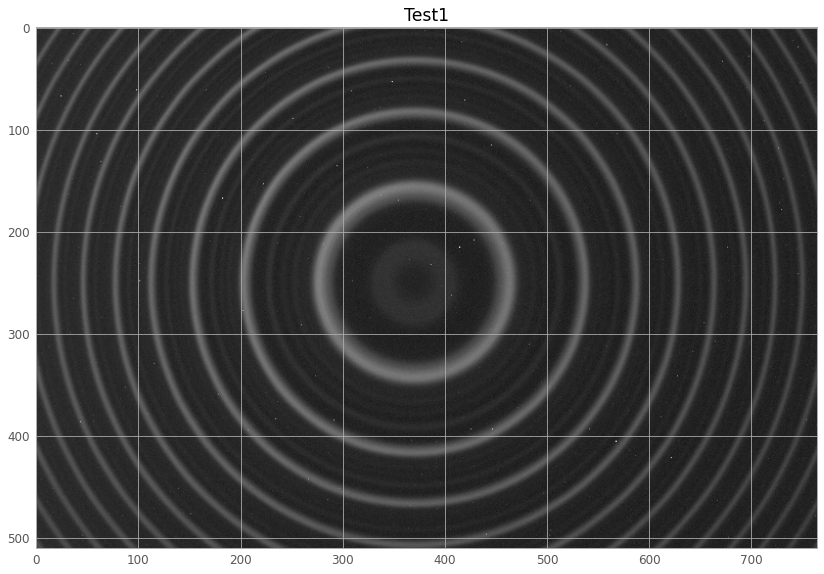

In [4]:
fig, axes = plt.subplots(figsize= (14,12))
axes.imshow(image_data, cmap = 'gray', norm= colors.PowerNorm(gamma=0.5))
axes.set_title('Test1')
# plt.gca().invert_yaxis()
plt.savefig('test1.png')
# colors.PowerNorm(gamma=0.5)
# colors.LogNorm(vmin=image_data.min(), vmax=image_data.max())

In [5]:
# shape 
# Y.shape is (n,m) for n rows and m colums 

In [6]:
# file_data = np.loadtxt('180NoBRun1.txt', dtype=int)
# print(file_data.shape)
# print(type(file_data))
# print(len(file_data))

In [7]:
bins = []
intensities = []

f = open('180NoBRun1.txt', 'r')
for row in f: 
    row = row.split()
    bins.append(int(row[0]))
    intensities.append(int(row[1]))

bins = np.array(bins)
intensities = np.array(intensities)

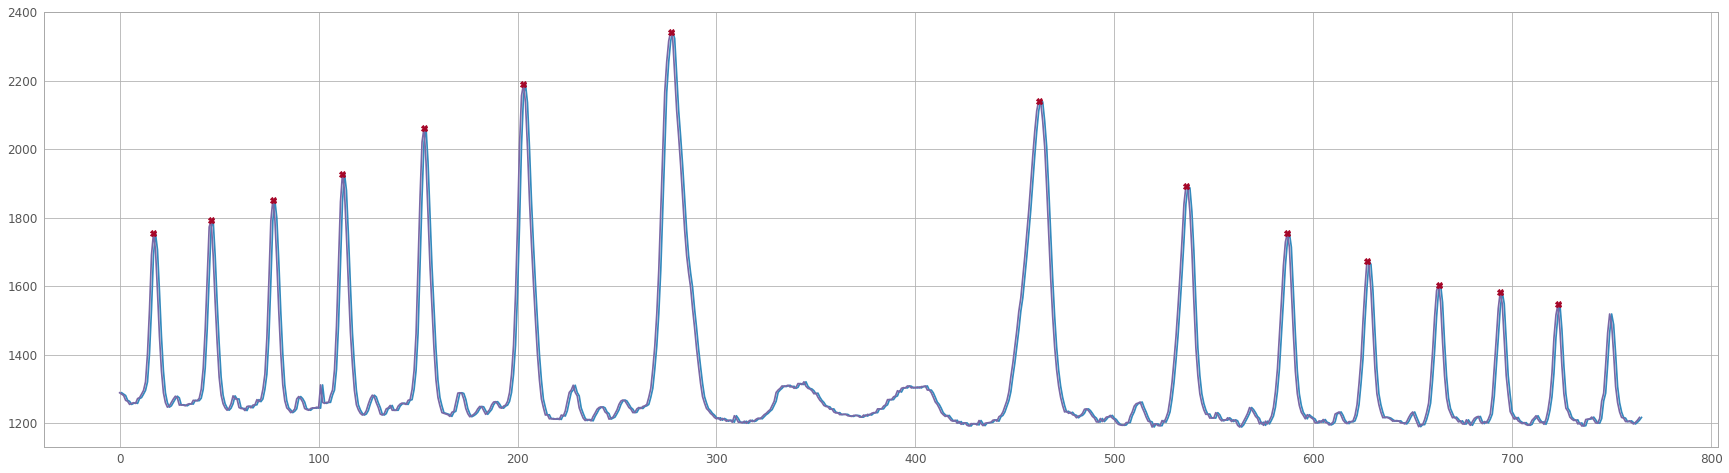

In [8]:
fig, axes = plt.subplots(figsize= (30,8))
axes.plot(bins, intensities, label= 'File Data')


def annot_max(x,y, ax=None):
    text= "({:.2f}, {:.2f})".format(x, y)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2", color='black')
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(x, y), xytext=(0.5,0.9), **kw)


peak = [bins[16],bins[45],bins[76],bins[111],bins[152],bins[202],bins[276],bins[461],bins[535],bins[586],bins[626],bins[662],bins[693],bins[722]]
peak = np.array(peak)
plt.plot(intensities)
plt.plot(peak, intensities[peak], "X")




In [9]:
# function 

def gaussian( x , *p ) :
    return np.absolute( p[0] ) * np.exp( -( x - p[1] )**2/( p[2]**2 ) )


def ZeemanPeakfit(x, *p): 
    return  gaussian( x , *p[0:3] ) + gaussian( x , *p[3:6] ) + gaussian( x , *p[6:9] ) + gaussian( x , *p[9:12] ) + gaussian( x , *p[12:15] ) + gaussian( x , *p[15:18] ) + gaussian( x , *p[18:21] ) + gaussian( x , *p[21:24] ) + gaussian( x , *p[24:27] ) + gaussian( x , *p[27:30] ) + gaussian( x , *p[30:33] ) + gaussian( x , *p[33:36] ) + gaussian( x , *p[36:39] ) + gaussian( x , *p[39:42] )  

def ZeemanPeakfit2(x, *p): 
    return gaussian( x , *p[0:3] ) + gaussian( x , *p[3:6] ) + gaussian( x , *p[6:9] ) 







In [10]:
p = np.zeros(42)
n = 0 
for i in len(intensities[ptru]):
    p[n] = intensities[peak][i] +0.5
    p[n+1] = peak[i]+.03
    # p[n+2] = 0.6
    # print(p[n])
    n += 3
    # print(n)
popt , pcov = curve_fit( ZeemanPeakfit , bins  , intensities, p0 = p, absolute_sigma = False , maxfev=100000)
# print(p)
# print(intensities[peak][13])..........0.3,.03,.7
p[2]=0.7
p[5]=0.7
p[8]=0.7
p[11]=0.6
p[14]=0.8
p[17]=0.8
p[20]=0.9
p[23]=0.9
p[26]=0.7
p[29]=0.7
p[32]=0.7
p[35]=0.7
p[38]=0.7
p[41]=0.7


popt , pcov = curve_fit( ZeemanPeakfit , bins  , intensities, p0 = p, absolute_sigma = False , maxfev=100000)


C:\Users\mpmun\AppData\Local\Temp\ipykernel_19252\2147669553.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return np.absolute( p[0] ) * np.exp( -( x - p[1] )**2/( p[2]**2 ) )
c:\Users\mpmun\OneDrive\Documents\1Pichardo\UCSC\Spring2022\Phys134\134code\Code\.venv\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


NameError: name 'param' is not defined

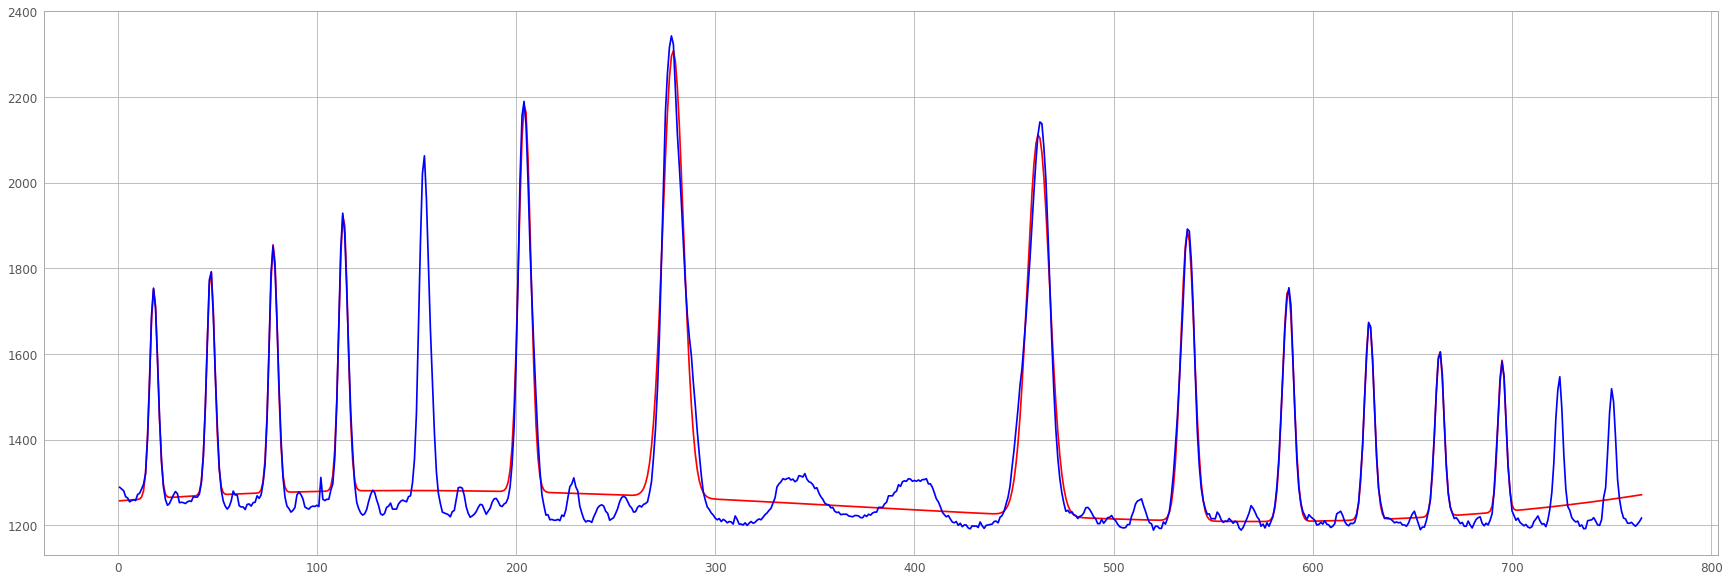

In [11]:
fit = ZeemanPeakfit(bins, *popt)
fig, axes = plt.subplots(figsize= (30,10))
axes.plot(bins, fit, color = 'r', label= 'Fit Data')
axes.plot(bins, intensities, label= 'File Data', color = 'b')

x = np.linspace(200,400,1000)
# g = gaussian(x,*param[6])+1200
# plt.plot(x,g, color ='black' )

plt.legend()

In [ ]:
# print(popt)
param = popt.reshape(-1,3)
print(len(param))
print(param[6])
print(param[7])
print(max(intensities[peak]))


14
[1042.99086944  278.83504463    7.32334885]
[890.82557394 462.25417525  -7.94443023]
2343


In [ ]:
print(intensities[peak])
print(peak)
# print(intensities[peak[0]])
# print(len(intensities[peak]))
# print(len(peak))
# print(type(intensities[peak]))


[1754 1792 1852 1929 2063 2190 2343 2142 1892 1755 1674 1605 1583 1547]
[ 17  46  77 112 153 203 277 462 536 587 627 663 694 723]


In [ ]:
peaks, _ = find_peaks(intensities, distance=25)
# plt.plot(intensities)
# plt.plot(peaks, intensities[peaks], "x")
# print(peaks)
# print(len(peaks)-7)

In [ ]:
# popt2 , pcov2 = curve_fit( VRMax2,w, Vout , sigma=VoutSig, p0 = p02, absolute_sigma=True,maxfev=2000, bounds=(0,(115,85000,15000)))
